In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
compiled_data = pd.read_csv('compiled_data.csv')
compiled_data['ww_date'] = pd.to_datetime(compiled_data['ww_date'],format='%Y-%m-%d')

res_df = pd.read_csv('results.csv')
res_df['start_date'] = pd.to_datetime(res_df['start_date'],format='%Y-%m-%d')
res_df['end_date'] = pd.to_datetime(res_df['end_date'],format='%Y-%m-%d')
res_df.set_index('wwtp_id',inplace=True)

for ind,_ in res_df.iterrows():
    sample_df = compiled_data[compiled_data['wwtp_id']==ind].sort_values(by=['ww_date'])
    res_df.loc[ind,'total_cases'] = sample_df['cases'].sum()
    res_df.loc[ind,'total_gc'] = (sample_df['population_served']*sample_df['pcr_conc_gc/cap/d']).sum()
    sm,rd = res_df.loc[ind,['sm','rd']]
    sm = 0.46e12 # update this with the reference actual value
    S = sm
    for i in range(1,28):
        S += sm*(1-rd)**i
    res_df.loc[ind,'S'] = S
    res_df.loc[ind,'estimated_cases'] = res_df.loc[ind,'total_gc']/S
    res_df.loc[ind,'silent_cases'] = res_df.loc[ind,'estimated_cases'] - res_df.loc[ind,'total_cases']
    if (res_df.loc[ind,'silent_cases']<0) or (res_df.loc[ind,'total_cases']==0):
        res_df.loc[ind,'ratio'] = 0
    else:
        res_df.loc[ind,'ratio'] = res_df.loc[ind,'silent_cases']/res_df.loc[ind,'total_cases']

In [3]:
res_df[res_df.index==1382]

,county_fips,county,state,population_served,sample_location,normalization_method,per_capita_flow_rate,start_date,end_date,days,...,lt,rd,k,half_life,total_cases,total_gc,S,estimated_cases,silent_cases,ratio
wwtp_id,,,,,,,,,,,,,,,,,,,,,
1382,4013,Maricopa,Arizona,50000,Treatment plant,flow-population,10162.706922,2022-07-30,2022-12-12,135,...,14,0.3,0.356675,1.942946,18.754619,2.693063e+16,1.533263e+12,17564.262452,17545.507833,935.529967


In [4]:
res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df.sm>1e13)][['sm']]

,sm
wwtp_id,
1382,3.519948e+14
1334,1.680067e+13
1545,1.696240e+13
1560,1.051971e+13
1593,1.040013e+13
291,2.177074e+13
1180,1.338536e+13
1083,1.065301e+13
1751,2.347985e+13


In [5]:
res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)].sm.describe()

count    1.950000e+02
mean     8.459468e+12
std      2.694218e+13
min      9.250961e+09
25%      1.147671e+12
50%      2.637421e+12
75%      6.651443e+12
max      3.519948e+14
Name: sm, dtype: float64

In [6]:
New_England = ['Connecticut','Maine','Massachusetts','New Hampshire','Rhode Island','Vermont']
Middle_Atlantic = ['New Jersey','New York','Pennsylvania']
Northeast = [*New_England,*Middle_Atlantic]

East_North_Central = ['Indiana','Illinois','Michigan','Ohio','Wisconsin']
West_North_Central = ['Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota','South Dakota']
Midwest = [*East_North_Central,*West_North_Central]

South_Atlantic = ['Delaware','District of Columbia','Florida','Georgia','Maryland','North Carolina','South Carolina','Virginia','West Virginia']
East_South_Central = ['Alabama','Kentucky','Mississippi','Tennessee']
West_South_Central = ['Arkansas','Louisiana','Oklahoma','Texas']
South = [*South_Atlantic,*East_South_Central,*West_South_Central]

Mountain = ['Arizona','Colorado','Idaho','New Mexico','Montana','Utah','Nevada','Wyoming']
Pacific = ['Alaska','California','Hawaii','Oregon','Washington']
West = [*Mountain,*Pacific]

region_di = {}
for state in New_England:
    region_di[state] = 'New England'
for state in Middle_Atlantic:
    region_di[state] = 'Middle Atlantic'
for state in East_North_Central:
    region_di[state] = 'East North Central'
for state in West_North_Central:
    region_di[state] = 'West North Central'
for state in South_Atlantic:
    region_di[state] = 'South Atlantic'
for state in East_South_Central:
    region_di[state] = 'East South Central'
for state in West_South_Central:
    region_di[state] = 'West South Central'
for state in Mountain:
    region_di[state] = 'Mountain'
for state in Pacific:
    region_di[state] = 'Pacific'

res_df['region'] = res_df['state'].map(lambda x: region_di[x])

series1 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['region']=='New England')]['sm'].values
series2 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['region']=='Middle Atlantic')]['sm'].values
series3 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['region']=='East North Central')]['sm'].values
series4 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['region']=='West North Central')]['sm'].values
series5 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['region']=='South Atlantic')]['sm'].values
series6 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['region']=='East South Central')]['sm'].values
series7 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['region']=='West South Central')]['sm'].values
series8 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['region']=='Mountain')]['sm'].values
series9 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['region']=='Pacific')]['sm'].values
n_series1 = len(series1)
n_series2 = len(series2)
n_series3 = len(series3)
n_series4 = len(series4)
n_series5 = len(series5)
n_series6 = len(series6)
n_series7 = len(series7)
n_series8 = len(series8)
n_series9 = len(series9)


In [7]:
data_x = [series1,series2,series3,series4,series5,series6,series7,series8,series9]

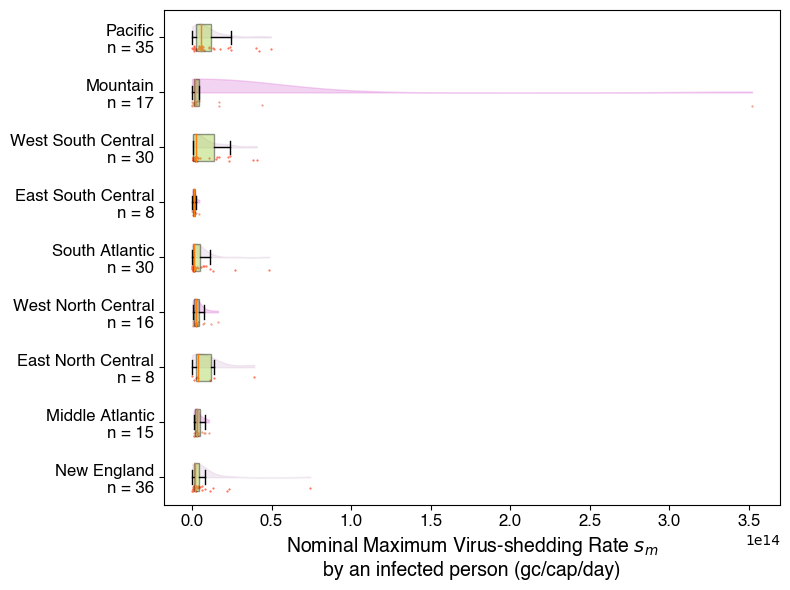

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen', 'olivedrab','yellowgreen', 'olivedrab','yellowgreen', 'olivedrab','yellowgreen', 'olivedrab','yellowgreen']

# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False, showfliers = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['thistle', 'orchid','thistle', 'orchid','thistle', 'orchid','thistle', 'orchid','thistle']

# Violinplot data
vp = ax.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['tomato', 'darksalmon','tomato', 'darksalmon','tomato', 'darksalmon','tomato', 'darksalmon','tomato']

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=.3, c=scatter_colors[idx])

ax.set_yticklabels([f'New England\nn = {n_series1}', f'Middle Atlantic\nn = {n_series2}',f'East North Central\nn = {n_series3}',f'West North Central\nn = {n_series4}',f'South Atlantic\nn = {n_series5}',\
    f'East South Central\nn = {n_series6}',f'West South Central\nn = {n_series7}',f'Mountain\nn = {n_series8}',f'Pacific\nn = {n_series9}'],fontname='Helvetica',fontsize=12)
ax.set_xlabel('Nominal Maximum Virus-shedding Rate $s_m$\nby an infected person (gc/cap/day)',fontname='Helvetica',fontsize=14)
plt.xticks(fontname='Helvetica',fontsize=12)
plt.tight_layout()
plt.savefig('fig8j.png',dpi=300)
plt.show()

In [9]:
np.percentile(series6,25),np.percentile(series6,50),np.percentile(series6,75)

(459580985120.2054, 984515276863.239, 1738535907799.1934)

In [10]:
res_df

,county_fips,county,state,population_served,sample_location,normalization_method,per_capita_flow_rate,start_date,end_date,days,...,rd,k,half_life,total_cases,total_gc,S,estimated_cases,silent_cases,ratio,region
wwtp_id,,,,,,,,,,,,,,,,,,,,,
1382,4013,Maricopa,Arizona,50000,Treatment plant,flow-population,10162.706922,2022-07-30,2022-12-12,135,...,0.300,0.356675,1.942946,18.754619,2.693063e+16,1.533263e+12,17564.262452,17545.507833,935.529967,Mountain
1383,4013,Maricopa,Arizona,2400000,Treatment plant,flow-population,776.106769,2022-07-30,2022-12-12,135,...,0.500,0.693147,0.999788,43210.641547,1.034629e+17,9.200000e+11,112459.635462,69248.993915,1.602591,Mountain
1334,4013,Maricopa,Arizona,150000,Treatment plant,flow-population,1216.112587,2022-07-17,2022-12-12,148,...,0.376,0.471605,1.469450,203.245058,1.004145e+16,1.223402e+12,8207.810792,8004.565734,39.383815,Mountain
1327,4015,Mohave,Arizona,30000,Treatment plant,flow-population,1092.726504,2022-07-13,2022-12-14,154,...,0.340,0.415515,1.667808,324.592593,2.695559e+15,1.352929e+12,1992.387690,1667.795097,5.138118,Mountain
1540,5009,Boone,Arkansas,14000,Treatment plant,flow-population,404.939999,2022-09-26,2022-12-14,79,...,0.371,0.463624,1.494746,140.628339,4.125664e+14,1.239889e+12,332.744520,192.116181,1.366127,West South Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,55025,Dane,Wisconsin,360000,Treatment plant,flow-population,928.363881,2022-06-21,2022-12-13,175,...,0.500,0.693147,0.999788,8426.445222,4.133653e+16,9.200000e+11,44931.012867,36504.567646,4.332143,East North Central
231,55025,Dane,Wisconsin,345000,Treatment plant,flow-population,370.183070,2022-01-07,2022-12-13,340,...,0.500,0.693147,0.999788,28858.678200,2.496388e+16,9.200000e+11,27134.653516,-1724.024684,0.000000,East North Central
433,55073,Marathon,Wisconsin,42350,Treatment plant,flow-population,93.056265,2022-01-08,2022-12-10,336,...,0.500,0.693147,0.999788,5417.632948,1.058068e+15,9.200000e+11,1150.074063,-4267.558885,0.000000,East North Central


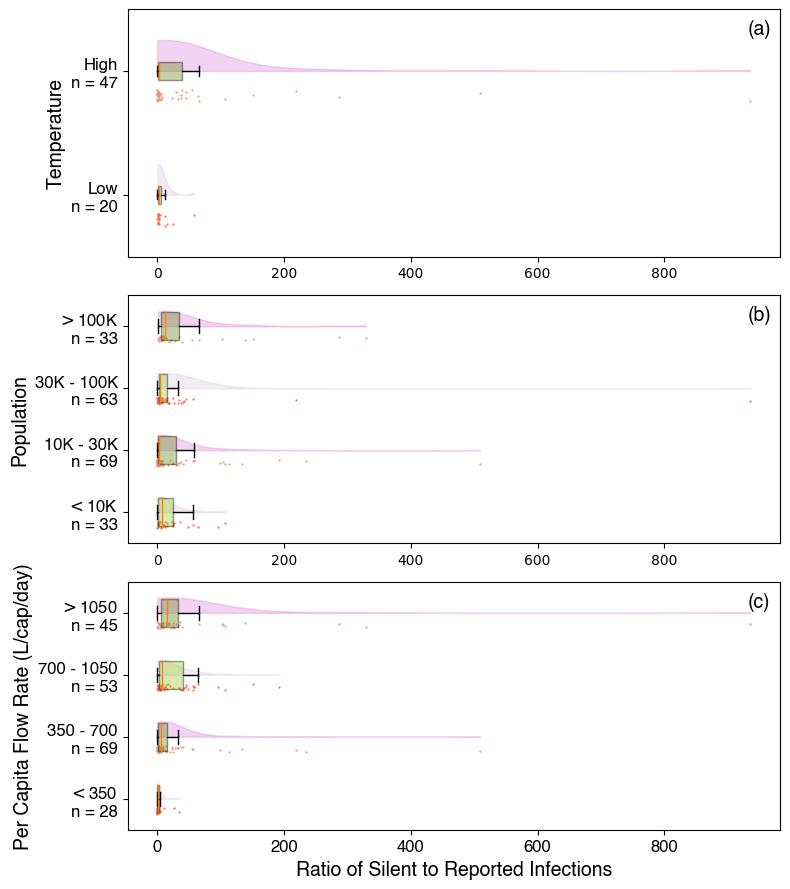

In [11]:
series1 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['state'].isin(['Alaska','Minnesota','North Dakota','Wyoming','Montana','Maine','Wisconsin','Idaho','Vermont','Michigan']))]['ratio'].values
series2 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['state'].isin(['Florida','Louisianna','Texas','Georgia','Mississippi','Alabama','South Carolina','Arizona','Arkansas','Oklahoma']))]['ratio'].values
n_series1 = len(series1)
n_series2 = len(series2)
data_x = [series1,series2]

fig, (ax,ax2,ax3) = plt.subplots(3,1,figsize=(8, 9))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen', 'olivedrab']

# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False, showfliers = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['thistle', 'orchid']

# Violinplot data
vp = ax.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['tomato', 'darksalmon']

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    ax.scatter(features, y, s=.3, c=scatter_colors[idx])

ax.set_yticklabels([f'Low\nn = {n_series1}', f'High\nn = {n_series2}'],fontname='Helvetica',fontsize=12)
ax.set_ylabel('Temperature',fontname='Helvetica',fontsize=14)

series1 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['population_served']<=10_000)]['ratio']
series2 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['population_served']>10_000)&(res_df['population_served']<=30_000)]['ratio']
series3 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['population_served']>30_000)&(res_df['population_served']<=10_0000)]['ratio']
series4 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['population_served']>=100_000)]['ratio']
n_series1 = len(series1)
n_series2 = len(series2)
n_series3 = len(series3)
n_series4 = len(series4)
data_x = [series1,series2,series3,series4]

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen', 'olivedrab','yellowgreen', 'olivedrab']

# Boxplot data
bp = ax2.boxplot(data_x, patch_artist = True, vert = False, showfliers = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['thistle', 'orchid','thistle', 'orchid']

# Violinplot data
vp = ax2.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['tomato', 'darksalmon','tomato', 'darksalmon']

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    ax2.scatter(features, y, s=.3, c=scatter_colors[idx])

ax2.set_yticklabels([f'$<$10K\nn = {n_series1}',f'10K - 30K\nn = {n_series2}',f'30K - 100K\nn = {n_series3}',f'$>$100K\nn = {n_series4}'],fontname='Helvetica',fontsize=12)
ax2.set_ylabel('Population',fontname='Helvetica',fontsize=14)



series1 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['per_capita_flow_rate']<=350)]['ratio']
series2 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['per_capita_flow_rate']>350)&(res_df['per_capita_flow_rate']<=700)]['ratio']
series3 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['per_capita_flow_rate']>700)&(res_df['per_capita_flow_rate']<=1050)]['ratio']
series4 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['per_capita_flow_rate']>=1050)]['ratio']
n_series1 = len(series1)
n_series2 = len(series2)
n_series3 = len(series3)
n_series4 = len(series4)
data_x = [series1,series2,series3,series4]

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen', 'olivedrab','yellowgreen', 'olivedrab']

# Boxplot data
bp = ax3.boxplot(data_x, patch_artist = True, vert = False, showfliers = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['thistle', 'orchid','thistle', 'orchid']

# Violinplot data
vp = ax3.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['tomato', 'darksalmon','tomato', 'darksalmon']

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    ax3.scatter(features, y, s=.3, c=scatter_colors[idx])

ax3.set_yticklabels([f'$<$350\nn = {n_series1}',f'350 - 700\nn = {n_series2}',f'700 - 1050\nn = {n_series3}',f'$>$1050\nn = {n_series4}'],fontname='Helvetica',fontsize=12)
ax3.set_ylabel('Per Capita Flow Rate (L/cap/day)',fontname='Helvetica',fontsize=14)

ax3.set_xlabel('Ratio of Silent to Reported Infections',fontname='Helvetica',fontsize=14)

ax.text(0.95,0.9,'(a)',transform=ax.transAxes,fontname='Helvetica',fontsize=14)
ax2.text(0.95,0.9,'(b)',transform=ax2.transAxes,fontname='Helvetica',fontsize=14)
ax3.text(0.95,0.9,'(c)',transform=ax3.transAxes,fontname='Helvetica',fontsize=14)
plt.xticks(fontname='Helvetica',fontsize=12)
plt.tight_layout()
plt.savefig('fig9j.png',dpi=300)
plt.show()

In [12]:
res_df.ratio.describe()

count    325.000000
mean      19.182366
std       69.199016
min        0.000000
25%        0.000000
50%        2.632061
75%        9.738456
max      935.529967
Name: ratio, dtype: float64

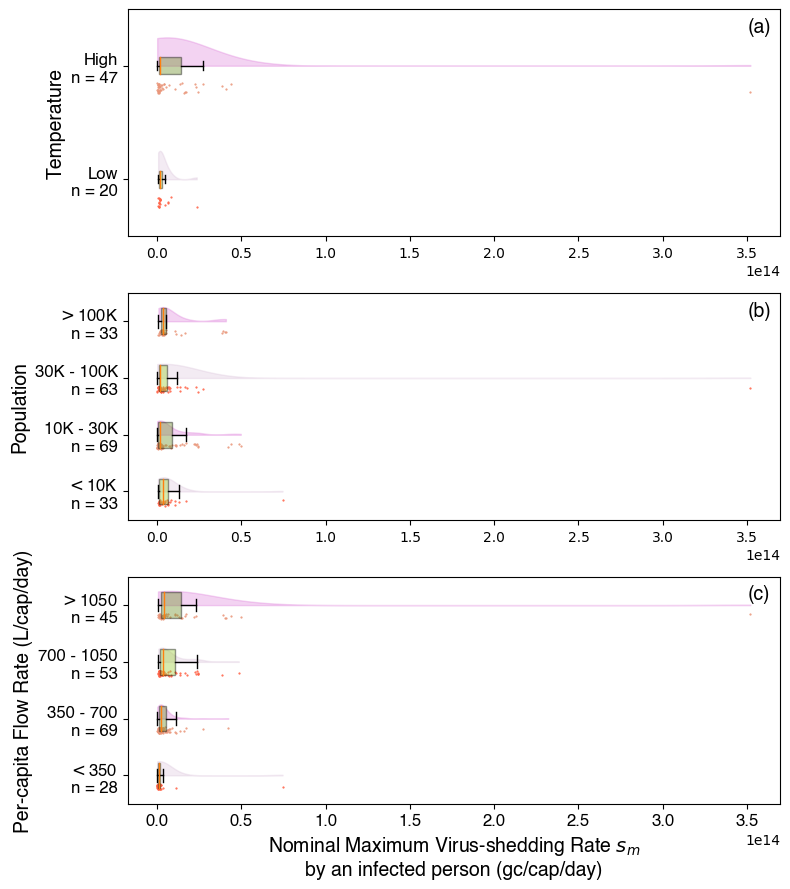

In [13]:
series1 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['state'].isin(['Alaska','Minnesota','North Dakota','Wyoming','Montana','Maine','Wisconsin','Idaho','Vermont','Michigan']))]['sm'].values
series2 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['state'].isin(['Florida','Louisianna','Texas','Georgia','Mississippi','Alabama','South Carolina','Arizona','Arkansas','Oklahoma']))]['sm'].values
n_series1 = len(series1)
n_series2 = len(series2)
data_x = [series1,series2]

fig, (ax,ax2,ax3) = plt.subplots(3,1,figsize=(8, 9))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen', 'olivedrab']

# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False, showfliers = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['thistle', 'orchid']

# Violinplot data
vp = ax.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['tomato', 'darksalmon']

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    ax.scatter(features, y, s=.3, c=scatter_colors[idx])

ax.set_yticklabels([f'Low\nn = {n_series1}', f'High\nn = {n_series2}'],fontname='Helvetica',fontsize=12)
ax.set_ylabel('Temperature',fontname='Helvetica',fontsize=14)

series1 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['population_served']<=10_000)]['sm']
series2 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['population_served']>10_000)&(res_df['population_served']<=30_000)]['sm']
series3 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['population_served']>30_000)&(res_df['population_served']<=10_0000)]['sm']
series4 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['population_served']>=100_000)]['sm']
n_series1 = len(series1)
n_series2 = len(series2)
n_series3 = len(series3)
n_series4 = len(series4)
data_x = [series1,series2,series3,series4]

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen', 'olivedrab','yellowgreen', 'olivedrab']

# Boxplot data
bp = ax2.boxplot(data_x, patch_artist = True, vert = False, showfliers = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['thistle', 'orchid','thistle', 'orchid']

# Violinplot data
vp = ax2.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['tomato', 'darksalmon','tomato', 'darksalmon']

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    ax2.scatter(features, y, s=.3, c=scatter_colors[idx])

ax2.set_yticklabels([f'$<$10K\nn = {n_series1}',f'10K - 30K\nn = {n_series2}',f'30K - 100K\nn = {n_series3}',f'$>$100K\nn = {n_series4}'],fontname='Helvetica',fontsize=12)
ax2.set_ylabel('Population',fontname='Helvetica',fontsize=14)



series1 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['per_capita_flow_rate']<=350)]['sm']
series2 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['per_capita_flow_rate']>350)&(res_df['per_capita_flow_rate']<=700)]['sm']
series3 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['per_capita_flow_rate']>700)&(res_df['per_capita_flow_rate']<=1050)]['sm']
series4 = res_df[(res_df['loss']<10)&(res_df['normalization_method']=='flow-population')&(res_df['total_cases']!=0)&(res_df['per_capita_flow_rate']>=1050)]['sm']
n_series1 = len(series1)
n_series2 = len(series2)
n_series3 = len(series3)
n_series4 = len(series4)
data_x = [series1,series2,series3,series4]

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen', 'olivedrab','yellowgreen', 'olivedrab']

# Boxplot data
bp = ax3.boxplot(data_x, patch_artist = True, vert = False, showfliers = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['thistle', 'orchid','thistle', 'orchid']

# Violinplot data
vp = ax3.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['tomato', 'darksalmon','tomato', 'darksalmon']

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    ax3.scatter(features, y, s=.3, c=scatter_colors[idx])

ax3.set_yticklabels([f'$<$350\nn = {n_series1}',f'350 - 700\nn = {n_series2}',f'700 - 1050\nn = {n_series3}',f'$>$1050\nn = {n_series4}'],fontname='Helvetica',fontsize=12)
ax3.set_ylabel('Per-capita Flow Rate (L/cap/day)',fontname='Helvetica',fontsize=14)

ax3.set_xlabel('Nominal Maximum Virus-shedding Rate $s_m$\nby an infected person (gc/cap/day)',fontname='Helvetica',fontsize=14)

ax.text(0.95,0.9,'(a)',transform=ax.transAxes,fontname='Helvetica',fontsize=14)
ax2.text(0.95,0.9,'(b)',transform=ax2.transAxes,fontname='Helvetica',fontsize=14)
ax3.text(0.95,0.9,'(c)',transform=ax3.transAxes,fontname='Helvetica',fontsize=14)
plt.xticks(fontname='Helvetica',fontsize=12)
plt.tight_layout()
plt.savefig('fig9j.png',dpi=300)
plt.show()